# Lesson 2: Predictive Analytics with Jupyter

In this workbook you will find:
- Techniques to prepare data for machine learning
- Recipes to train and evaluate classification models
---

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set plot appearance
# See here for more options: https://matplotlib.org/users/customizing.html

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)

# Ignore warnings (for seaborn's kdeplot)
# import warnings
# warnings.filterwarnings('ignore')

c:\ProgramData\Anaconda3\lib\site-packages\numpy\__init__.py:143: UserWarning: mkl-service package failed to import, therefore Intel(R) MKL initialization ensuring its correct out-of-the box operation under condition when Gnu OpenMP had already been loaded by Python process is not assured. Please install mkl-service package, see http://github.com/IntelPython/mkl-service
  from . import _distributor_init


ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "c:\ProgramData\Anaconda3\python.exe"
  * The NumPy version is: "1.20.3"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: 找不到指定的模組。


In [ ]:
#%load_ext version_information
#%version_information pandas, numpy, matplotlib, seaborn, sklearn

---

## Topic A: Preparing to train a predictive model	

---
### Subtopic B: Preparing data for machine learning
---
#### Merging data

In [ ]:
pd.merge?

we will build two simple DataFrames from scratch.
As can be seen, they contain a product column with
some shared entrie

In [ ]:
# Build a simple set of tables

df_1 = pd.DataFrame({'product': ['red shirt', 'red shirt', 'red shirt', 'white dress'],
                     'price': [49.33, 49.33, 32.49, 199.99]})
df_2 = pd.DataFrame({'product': ['red shirt', 'blue pants', 'white tuxedo', 'white dress'],
                     'in_stock': [True, True, False, False]})

In [ ]:
print(df_1)

       product   price
0    red shirt   49.33
1    red shirt   49.33
2    red shirt   32.49
3  white dress  199.99


In [ ]:
df_2

,product,in_stock
0,red shirt,True
1,blue pants,True
2,white tuxedo,False
3,white dress,False


In [ ]:
# Inner merge return only the shared items

df_dataframe = pd.merge(left=df_1, right=df_2, on='product', how='inner')
df_dataframe

,product,price,in_stock
0,red shirt,49.33,True
1,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False


In [ ]:
# Outer merge return all  all of the data from each table where missing
#values have been labeled with NaN

df = pd.merge(left=df_1, right=df_2, on='product', how='outer')
df

,product,price,in_stock
0,red shirt,49.33,True
1,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


---
#### De-duplicating

In [ ]:
# Standard method to remove duplicate rows

df.drop_duplicates()

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [ ]:
df.drop_duplicates?

#checked

In [ ]:
# Using masks for more fine tuned control

df.duplicated()

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

Sum the result to determine how many rows have been
duplicated by running the following code:


In [ ]:
df.duplicated().sum()

1

In [ ]:
df[df.duplicated()]

,product,price,in_stock
1,red shirt,49.33,True


using the tilde (~) to take the opposite of that mask,

In [ ]:
df[~df.duplicated()]

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


drop
duplicates from a subset of the full DataFrame

In [ ]:
df[~df['product'].duplicated()]

,product,price,in_stock
0,red shirt,49.33,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


---
#### Handling missing data

In [ ]:
df.drop_duplicates()
df

,product,price,in_stock
0,red shirt,49.33,True
1,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [ ]:
df.drop_duplicates(inplace=True)
df

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [ ]:
# Drop the incomplete rows

df.dropna()

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False


In [ ]:
# Drop the incomplete columns
#axis default 0- remove the imcomplete rows, axis =1 mean remove the imcomplete columns 
print(df)
df2 = df.dropna(axis=1)
print(df2)

        product   price  in_stock
0     red shirt   49.33      True
2     red shirt   32.49      True
3   white dress  199.99     False
4    blue pants     NaN      True
5  white tuxedo     NaN     False
        product  in_stock
0     red shirt      True
2     red shirt      True
3   white dress     False
4    blue pants      True
5  white tuxedo     False


In [ ]:
# DataFrame method for filling missing values

df.fillna?

In [ ]:
# Fill with the average

df.fillna(value=df.price.mean())

,product,price,in_stock
0,red shirt,49.330000,True
2,red shirt,32.490000,True
3,white dress,199.990000,False
4,blue pants,93.936667,True
5,white tuxedo,93.936667,False


In [ ]:
# Fill with the previous value in that column

df.fillna(method='pad')

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,199.99,True
5,white tuxedo,199.99,False


---
#### Building training data sets

In [ ]:
df = df.fillna(value=df.price.mean())
ratings = ['low', 'medium', 'high']
#makes the random numbers predictable
np.random.seed(2)
df['rating'] = np.random.choice(ratings, len(df))
df

,product,price,in_stock,rating
0,red shirt,49.330000,True,low
2,red shirt,32.490000,True,medium
3,white dress,199.990000,False,low
4,blue pants,93.936667,True,high
5,white tuxedo,93.936667,False,high


In [ ]:
import numpy
import array
numpy.random.seed(0) ; numpy.random.rand(4)
#array([ 0.55,  0.72,  0.6 ,  0.54])
numpy.random.seed(0) ; numpy.random.rand(4)
#array([ 0.55,  0.72,  0.6 ,  0.54])

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318])

In [ ]:
## Convert in_stock to binary

df.in_stock = df.in_stock.map({False: 0, True: 1})
df

,product,price,in_stock,rating
0,red shirt,49.330000,1,low
2,red shirt,32.490000,1,medium
3,white dress,199.990000,0,low
4,blue pants,93.936667,1,high
5,white tuxedo,93.936667,0,high


In [ ]:
# Encode ordinal labels
#Encode target labels with value between 0 and n_classes-1.
from sklearn.preprocessing import LabelEncoder
rating_encoder = LabelEncoder()
df.rating = rating_encoder.fit_transform(df.rating)
df

,product,price,in_stock,rating
0,red shirt,49.330000,1,1
2,red shirt,32.490000,1,2
3,white dress,199.990000,0,1
4,blue pants,93.936667,1,0
5,white tuxedo,93.936667,0,0


In [ ]:
# Convert back if needed

rating_encoder.inverse_transform(df.rating)

array(['low', 'medium', 'low', 'high', 'high'], dtype=object)

In [ ]:
# One-hot-encode the product feature

df = pd.get_dummies(df)
df

,price,in_stock,rating,product_blue pants,product_red shirt,product_white dress,product_white tuxedo
0,49.330000,1,1,0,1,0,0
2,32.490000,1,2,0,1,0,0
3,199.990000,0,1,0,0,1,0
4,93.936667,1,0,1,0,0,0
5,93.936667,0,0,0,0,0,1


In [ ]:
# Split into training and testing sets

features = ['price', 'rating', 'product_blue pants',
            'product_red shirt', 'product_white dress',
            'product_white tuxedo']
X = df[features].values

target = 'in_stock'
y = df[target].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3)
    
print('         shape')
print('--------------')
print('X_train', X_train.shape)
print('X_test ', X_test.shape)
print('y_train', y_train.shape)
print('y_test ', y_test.shape)

         shape
--------------
X_train (3, 6)
X_test  (2, 6)
y_train (3,)
y_test  (2,)


---
### Activity A: Preparing to train a predictive model for the employee retention problem

---

In [ ]:
%%bash
#head ../data/hr-analytics/hr_data.csv
head hr_data.csv

head: cannot open 'hr_data.csv' for reading: No such file or directory


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving hr_data.csv to hr_data.csv


In [ ]:
# Read the data

df = pd.read_csv('hr_data.csv')

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'is_smoker', 'department', 'salary'],
      dtype='object')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


In [ ]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low
14998,0.37,0.52,2,158.0,3.0,0,yes,0,NaN,support,low


In [ ]:
# How many lines in the CSV (including header)

with open('hr_data.csv') as f:
    print(len(f.read().splitlines()))

15000


In [ ]:
# How many samples did we load into Python?

len(df)

14999

---
Assess the target

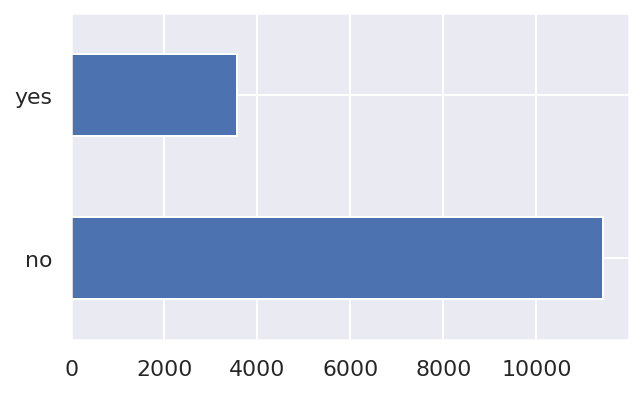

In [ ]:
# How is it distributed?

fig, ax = plt.subplots(figsize=(5, 3))
df.left.value_counts().plot(kind = 'barh');

In [ ]:
# How much missing data?

df.left.isnull().sum()

0

---
Assess the features

In [ ]:
# Print datatypes

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company       float64
work_accident              int64
left                      object
promotion_last_5years      int64
is_smoker                 object
department                object
salary                    object
dtype: object

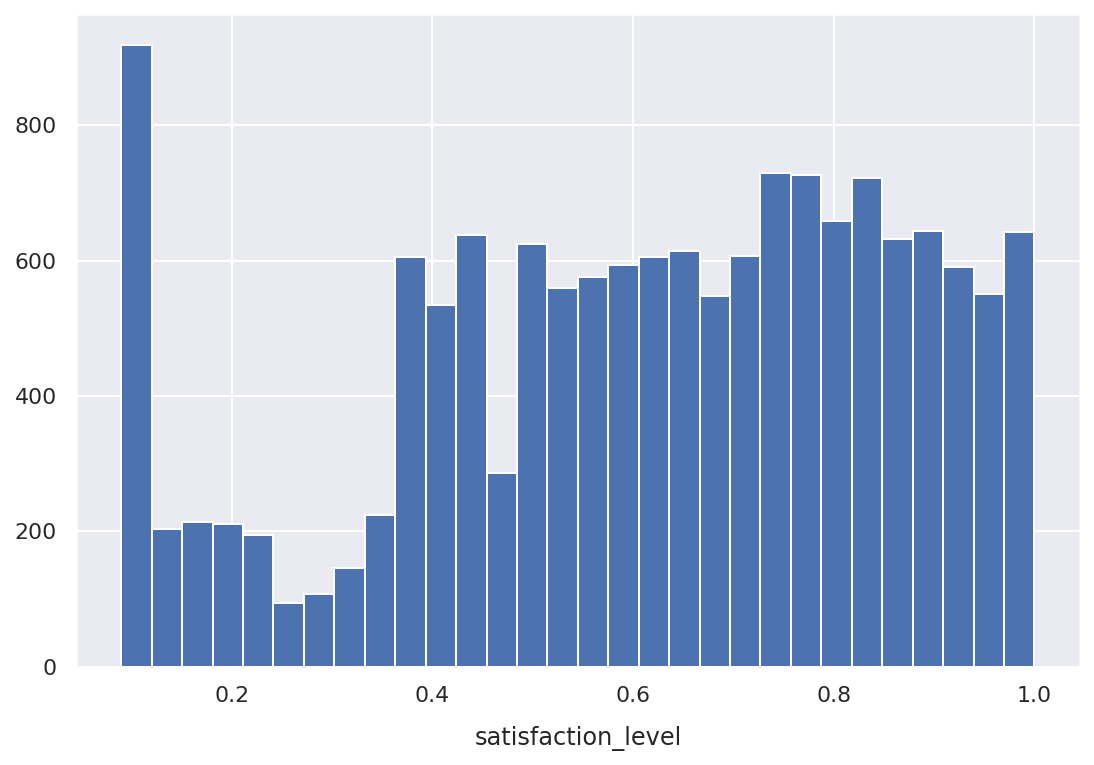

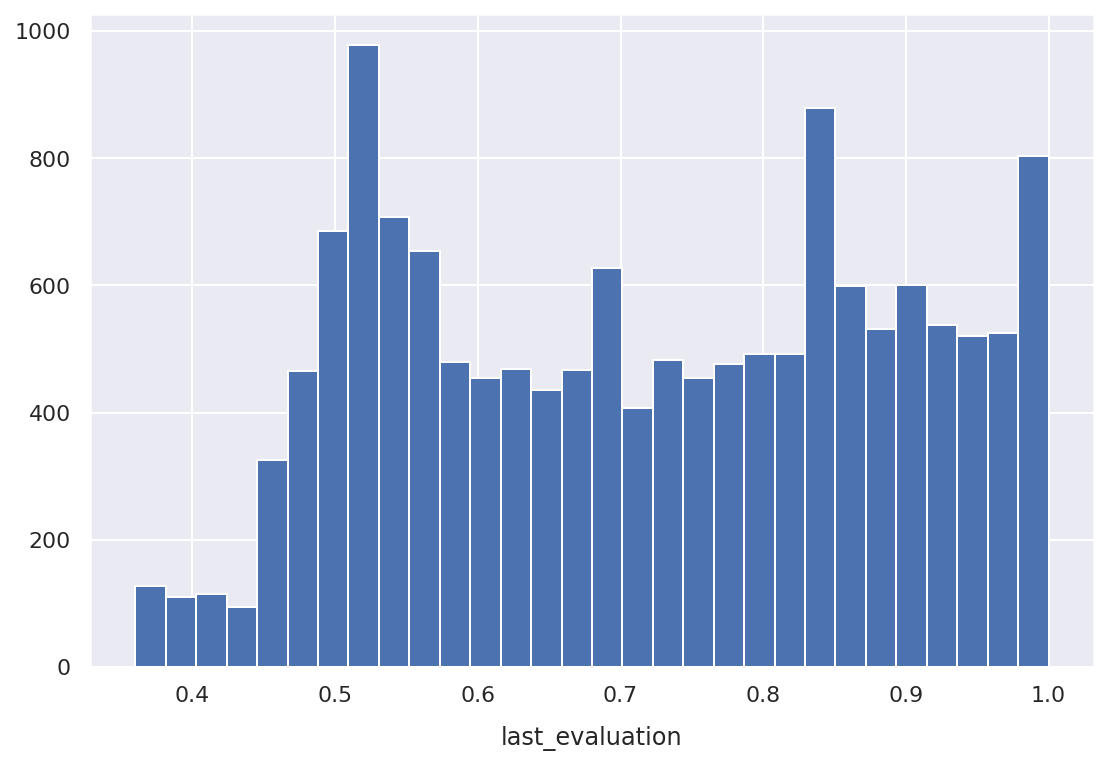

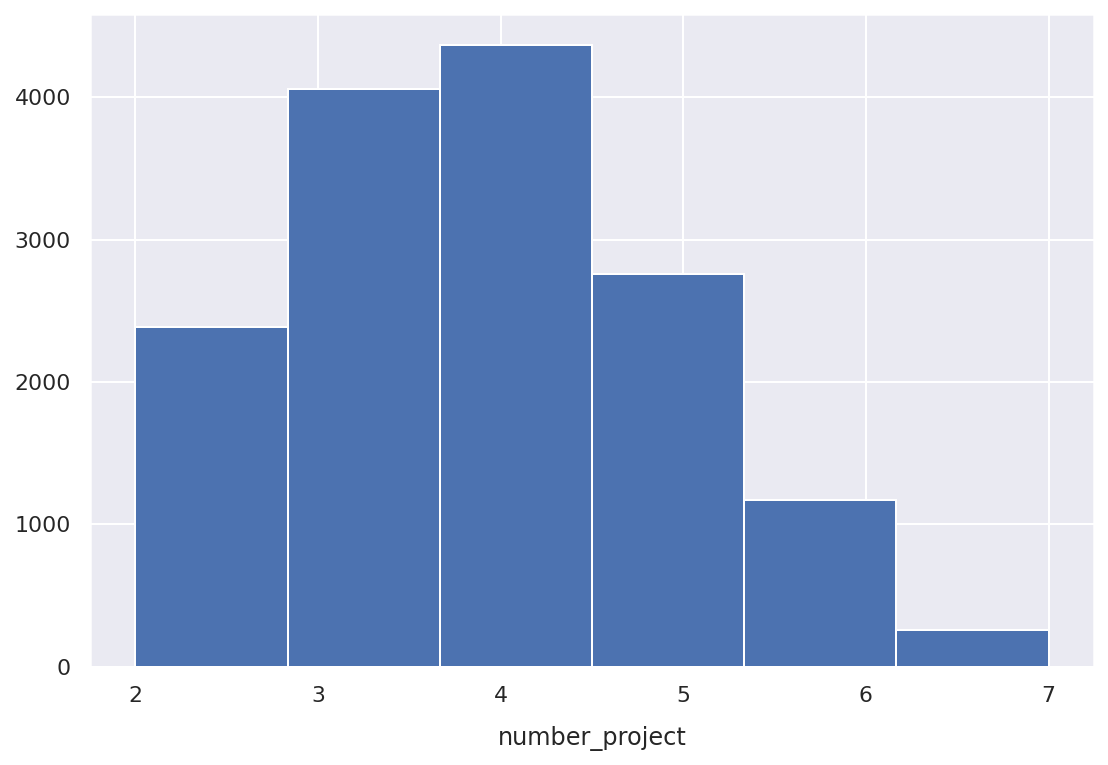

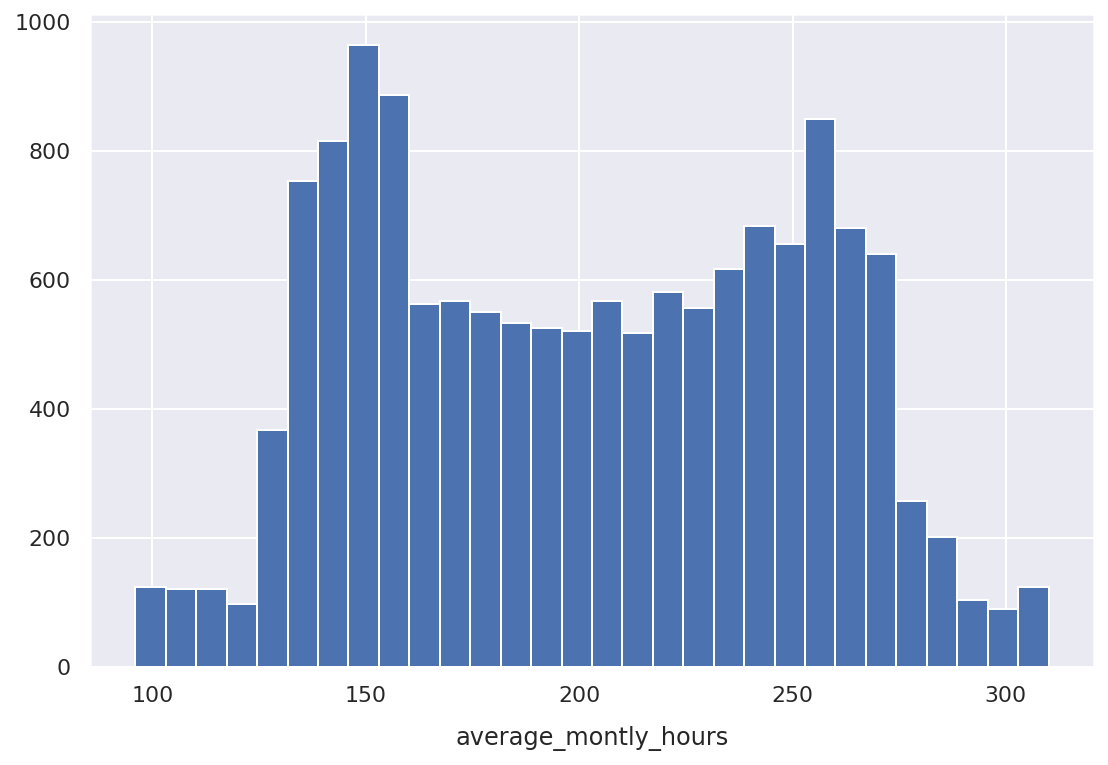

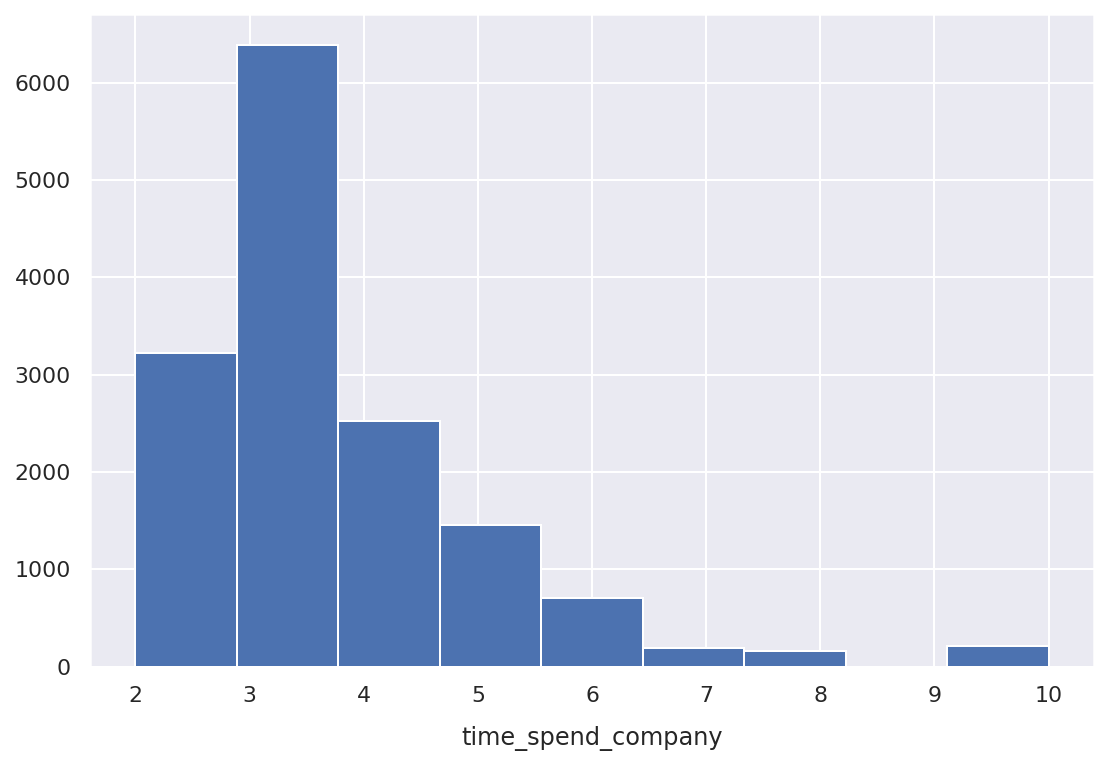

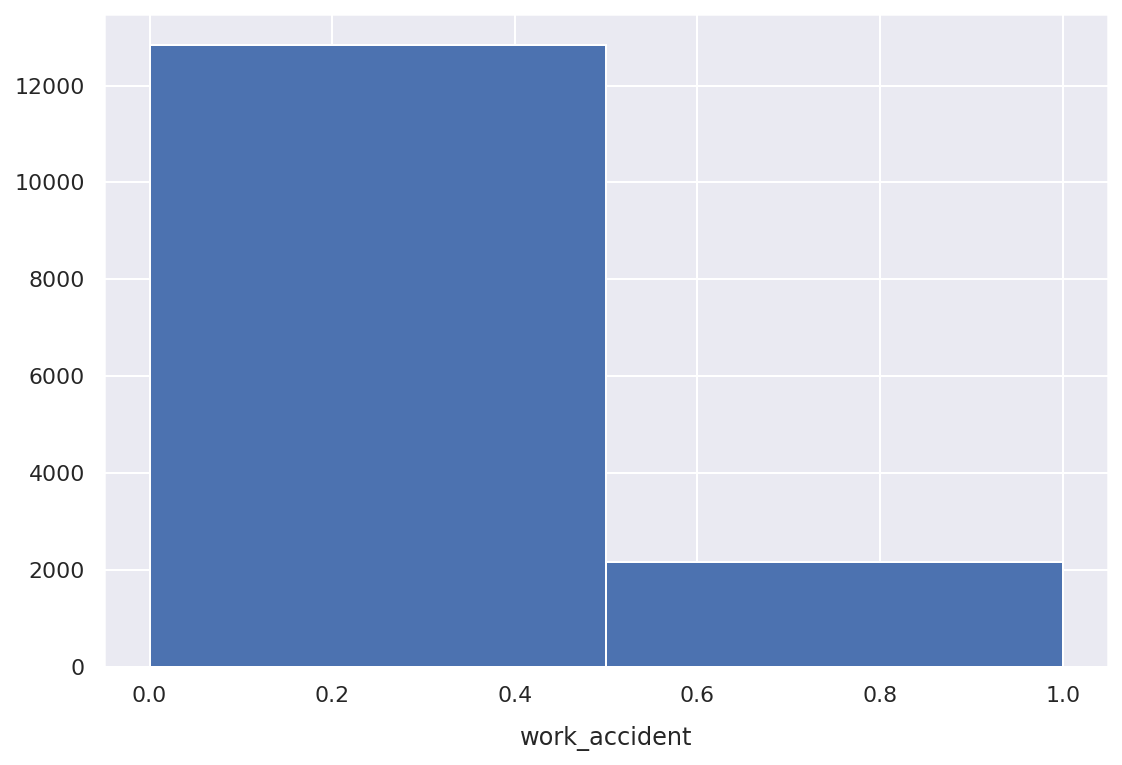

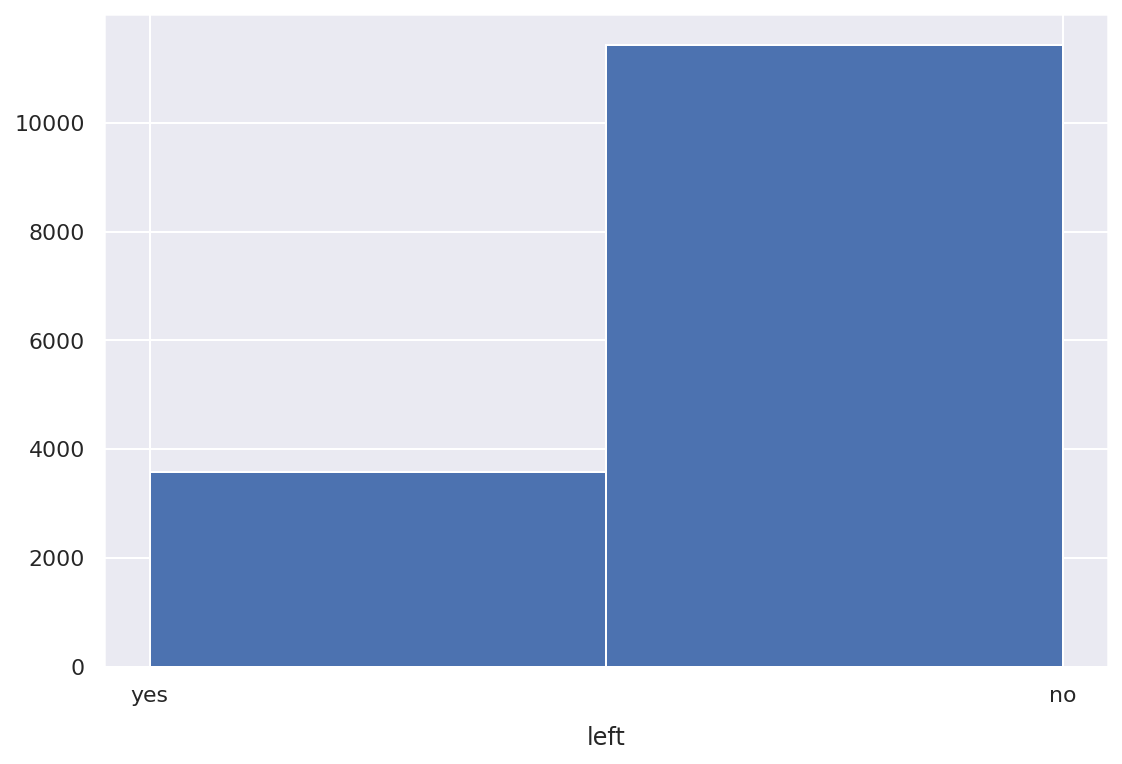

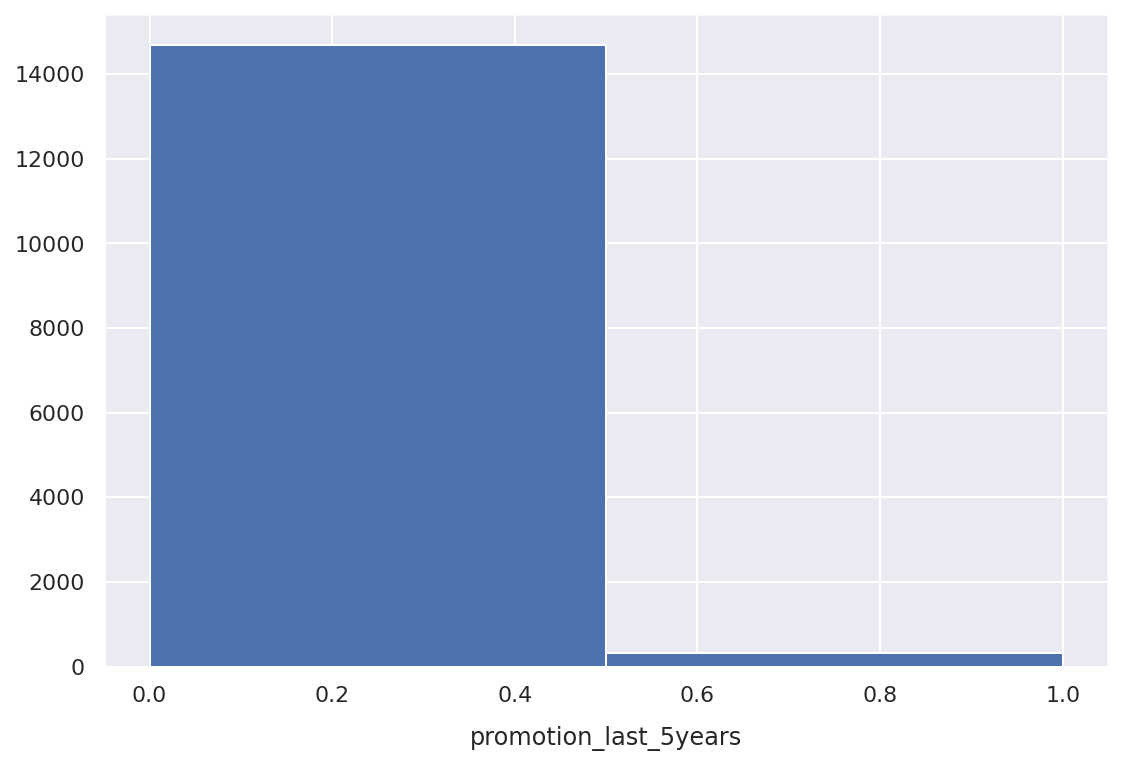

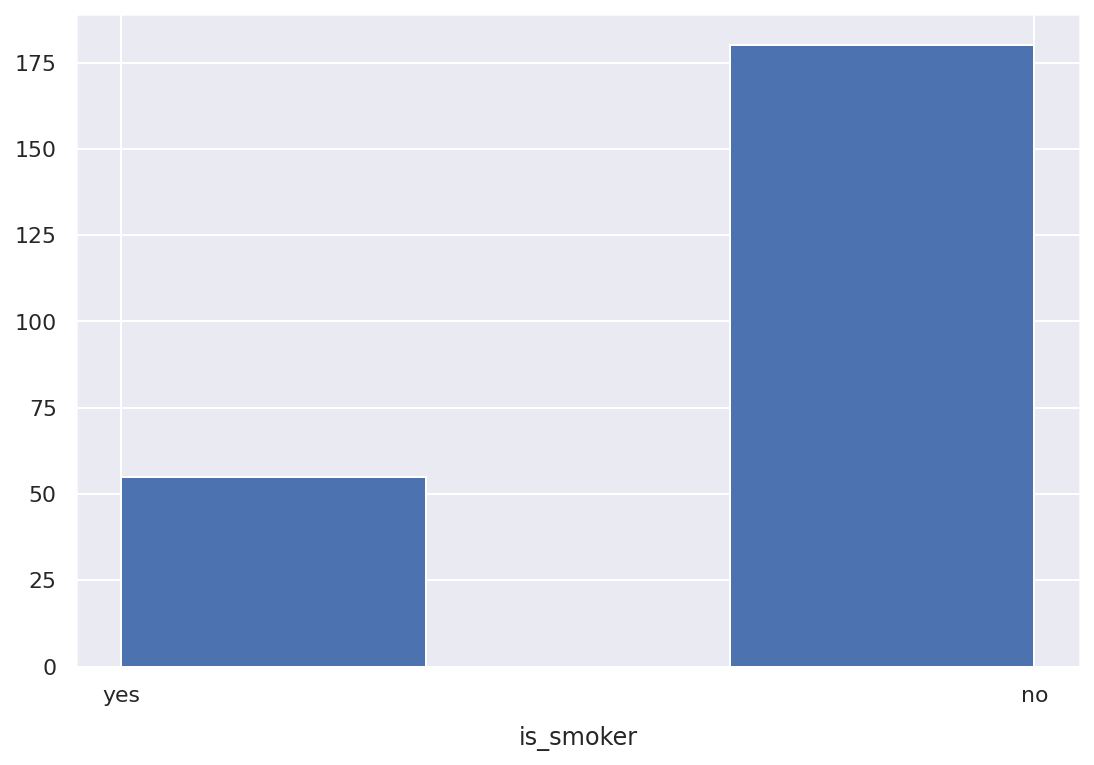

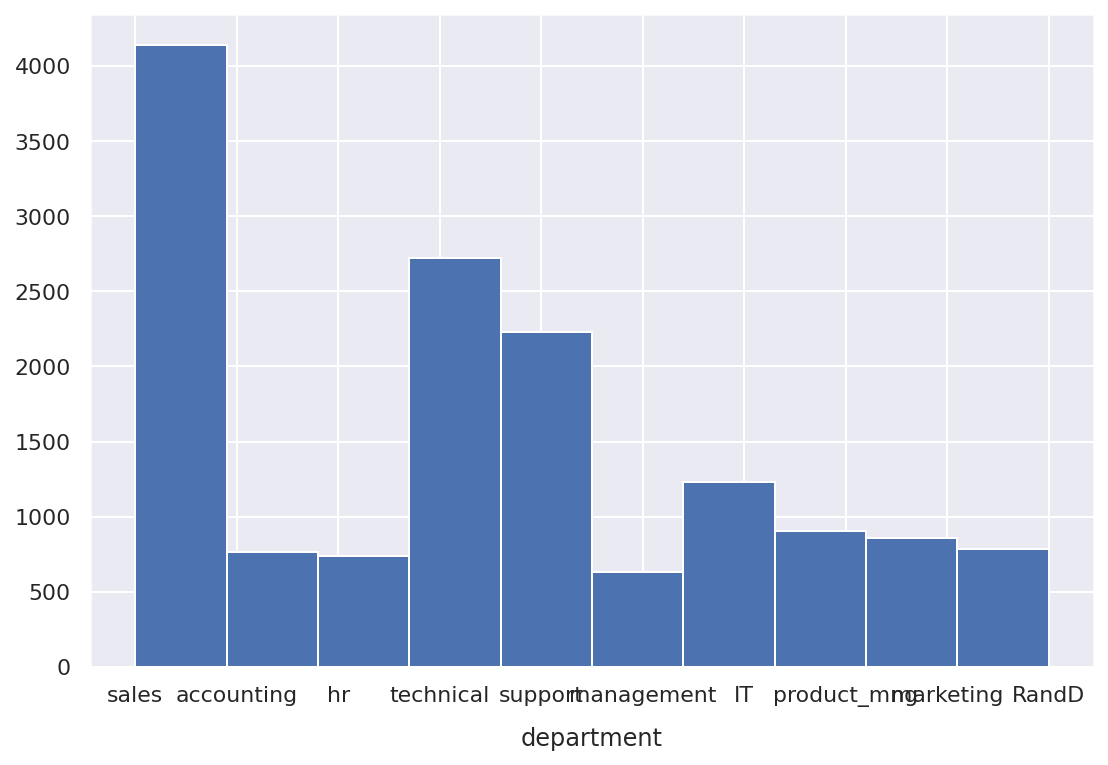

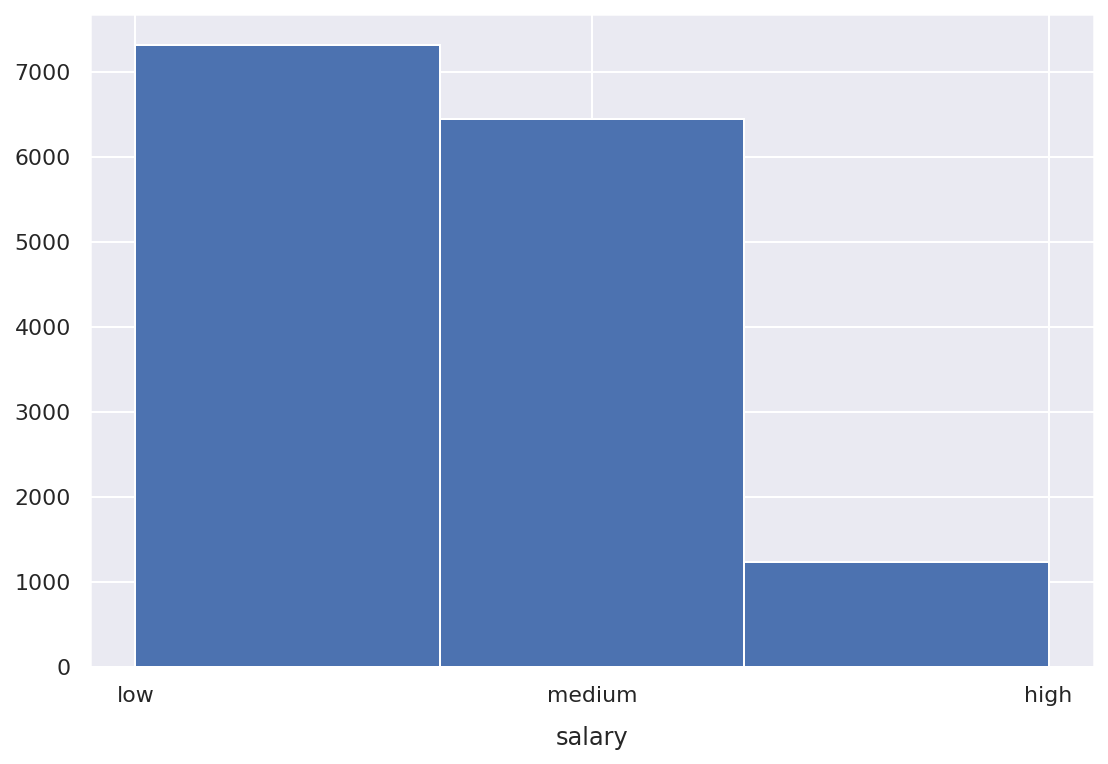

In [ ]:
# Print the distibutions

for f in df.columns:
    try:
        fig = plt.figure()
        num_bins = min((30, len(df[f].unique())))
        df[f].hist(bins=num_bins)
        plt.xlabel(f)
    except TypeError:
        print()
        print(df[f].value_counts())
        print('-'*30)
        plt.close()

In [ ]:
# How many NaNs?

df.isnull().sum() / len(df) * 100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      2.453497
time_spend_company        1.006734
work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
is_smoker                98.433229
department                0.000000
salary                    0.000000
dtype: float64

In [ ]:
# Remove is_smoker

del df['is_smoker']

In [ ]:
# Fill time_spend_company

fill_value = df.time_spend_company.median()
df.time_spend_company = df.time_spend_company.fillna(fill_value)

In [ ]:
df.isnull().sum() / len(df) * 100

satisfaction_level       0.000000
last_evaluation          0.000000
number_project           0.000000
average_montly_hours     2.453497
time_spend_company       0.000000
work_accident            0.000000
left                     0.000000
promotion_last_5years    0.000000
department               0.000000
salary                   0.000000
dtype: float64

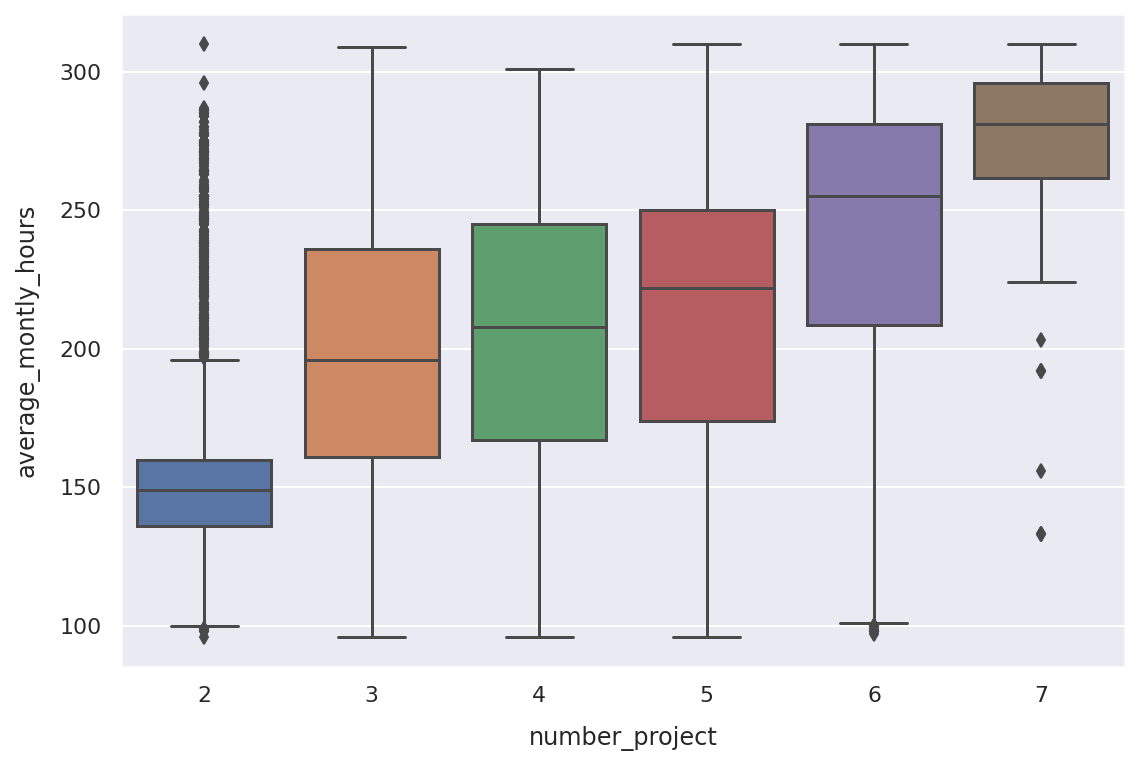

In [ ]:
# How does average_montly_hours depend on number_project

sns.boxplot(x='number_project', y='average_montly_hours', data=df)
#plt.savefig('../figures/lesson-2-hr-analytics-hours-num-proj-boxplot.png',
#            bbox_inches='tight', dpi=300)

In [ ]:
# Calculate fill values for average_montly_hours

mean_per_project = df.groupby('number_project')\
                    .average_montly_hours.mean()
mean_per_project = dict(mean_per_project)
mean_per_project

{2: 160.16353543979506,
 3: 197.47882323104236,
 4: 205.07858315740089,
 5: 211.99962839093274,
 6: 238.73947368421054,
 7: 276.015873015873}

In [ ]:
# Fill average_monthly_hours with the appropriate values

fill_values = df.number_project.map(mean_per_project)
df.average_montly_hours = df.average_montly_hours.fillna(fill_values)

In [ ]:
# Make sure we are all clear of NaNs

assert df.isnull().sum().sum() == 0

In [ ]:
# Convert categorical features to binary integer representation

df.left = df.left.map({'no': 0, 'yes': 1})
df = pd.get_dummies(df)

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [ ]:
# Save to file
from google.colab import files
df.to_csv('hr_data_processed.csv', index=False)
#files.download('hr_data_processed.csv')

---
## Topic B: Training classification models   
We train SVMs, random forests and K-nearest neighbors classification models.

---
### Subtopic A: Introduction to classification algorithms

---

In [ ]:
# Set default figure size

plt.rcParams['figure.figsize'] = (8, 8)

In [ ]:
# Load the processed data
#from google.colab import files

#uploaded = files.upload()

df = pd.read_csv('hr_data_processed.csv')

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157.000000,3.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262.000000,6.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272.000000,4.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223.000000,5.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,160.163535,3.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151.000000,3.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160.000000,3.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143.000000,3.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280.000000,4.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


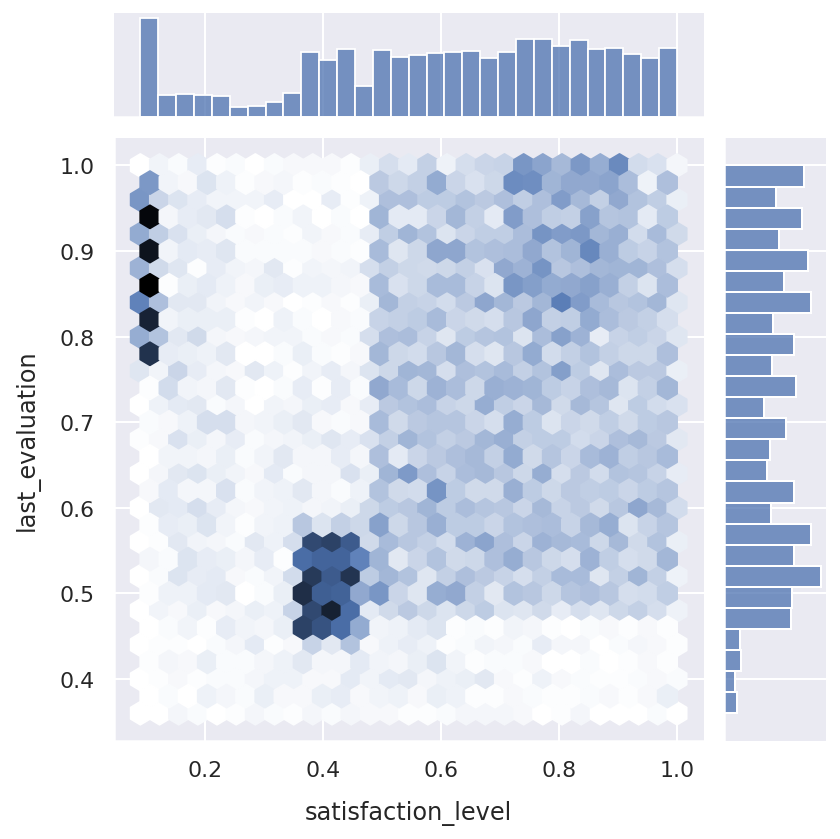

In [ ]:
## The two features we'll use for training in this section

sns.jointplot('satisfaction_level', 'last_evaluation',
              data=df, kind='hex')
#plt.savefig('../figures/lesson-2-hr-analytics-jointplot.png',
#            bbox_inches='tight', dpi=300)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Se

Text(0.25, 1.05, 'left = 1')

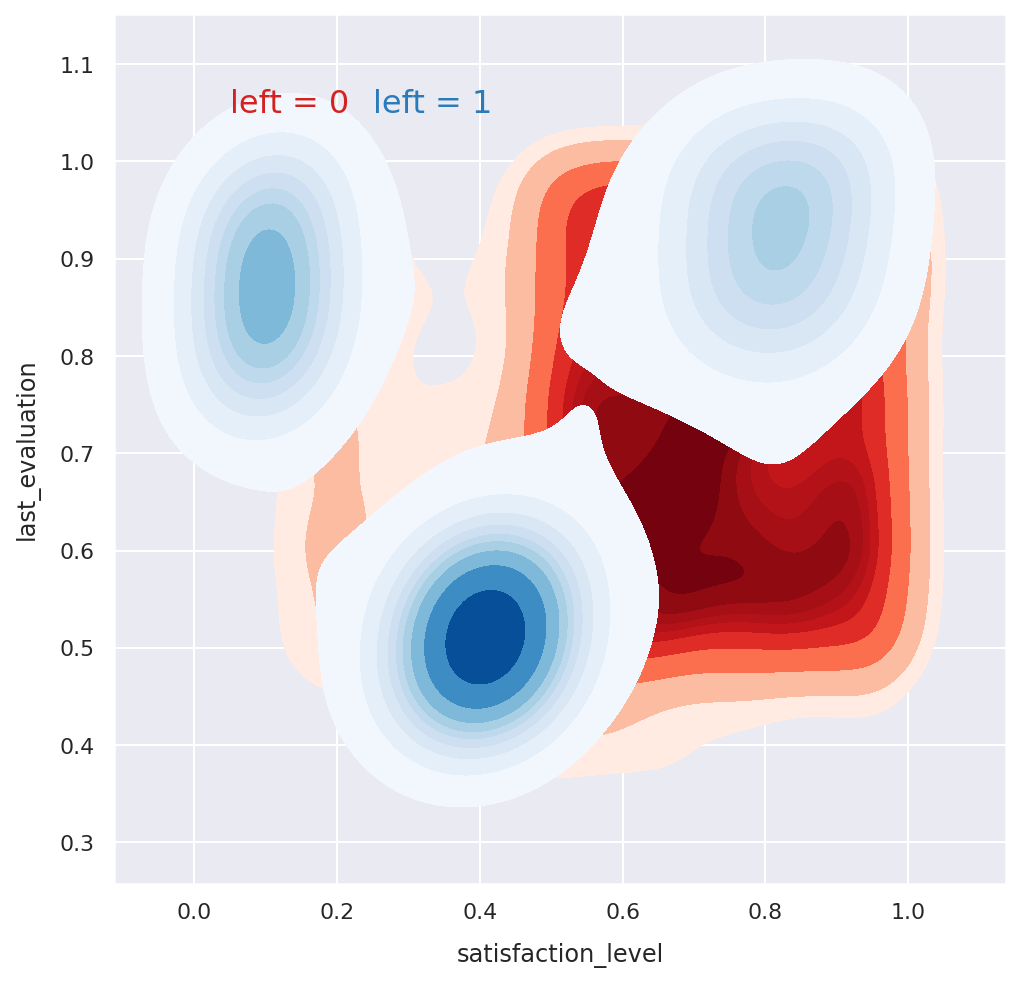

In [ ]:
# Segementing by the target variable

fig, ax = plt.subplots()
plot_args = dict(shade=True, shade_lowest=False)
for i, c in zip((0, 1), ('Reds', 'Blues')):
    sns.kdeplot(df.loc[df.left==i, 'satisfaction_level'],
                df.loc[df.left==i, 'last_evaluation'],
                cmap=c, **plot_args)
ax.text(0.05, 1.05, 'left = 0', size=16, color=sns.color_palette('Reds')[-2])
ax.text(0.25, 1.05, 'left = 1', size=16, color=sns.color_palette('Blues')[-2])
#plt.savefig('../figures/lesson-2-hr-analytics-bivariate-segmented.png',
#            bbox_inches='tight', dpi=300)

In [ ]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

features = ['satisfaction_level', 'last_evaluation']
X_train, X_test, y_train, y_test = train_test_split(
    df[features].values, df['left'].values,
    test_size=0.3, random_state=1)




#x_train: The training part of the first sequence (x)
#x_test: The test part of the first sequence (x)
#y_train: The training part of the second sequence (y)
#y_test: The test part of the second sequence (y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_train


array([[0.81, 0.6 ],
       [0.58, 0.79],
       [0.81, 0.83],
       ...,
       [0.11, 0.78],
       [0.83, 0.85],
       [0.75, 0.93]])

In [ ]:
X_train_std

array([[ 0.79082013, -0.67365661],
       [-0.13851263,  0.4374042 ],
       [ 0.79082013,  0.67131175],
       ...,
       [-2.03758393,  0.37892732],
       [ 0.87163167,  0.78826552],
       [ 0.54838549,  1.2560806 ]])

In [ ]:
# Scale the data for SVMs and K-Nearest Neighbors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
#REMEMBER transform for testing dataset not fit_transform
#Because it will use the mean and std from the training set instead of generating new mean and std from the testing ste
#this will avoid the- bias and overfitting in forecasting 
X_test_std = scaler.fit_transform(X_test)
X_test

array([[0.67, 0.39],
       [0.51, 0.98],
       [0.66, 0.54],
       ...,
       [0.93, 0.76],
       [0.8 , 0.51],
       [0.81, 0.99]])

In [ ]:
X_test_std

array([[ 0.24099913, -1.91364348],
       [-0.39590945,  1.52643685],
       [ 0.20119235, -1.03904678],
       ...,
       [ 1.27597558,  0.24369503],
       [ 0.75848736, -1.21396612],
       [ 0.79829415,  1.58474329]])

In [ ]:
# Train a support vector machine classifier

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# What is the classification accuracy?

from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print('accuracy = {:.1f}%'.format(acc*100))

accuracy = 75.9%


In [ ]:
# What is the accuracy by class?

from sklearn.metrics import confusion_matrix

print('percent accuracy score per class:')
cmat = confusion_matrix(y_test, y_pred)
scores = cmat.diagonal() / cmat.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores[0]))
print('left = 1 : {:.2f}%'.format(scores[1]))

percent accuracy score per class:
left = 0 : 100.00%
left = 1 : 0.00%


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


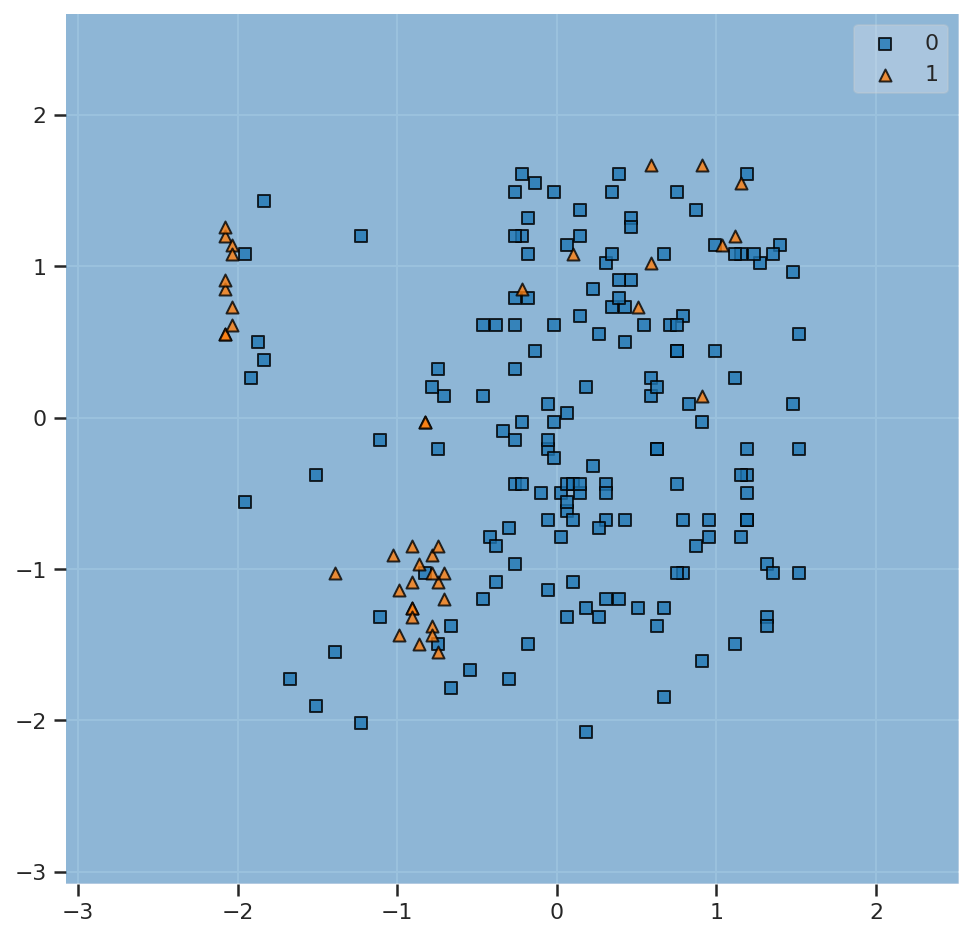

In [ ]:
from mlxtend.plotting import plot_decision_regions
N_samples = 200

X, y = X_train_std[:N_samples], y_train[:N_samples]
plot_decision_regions(X, y, clf=svm)

In [ ]:
def check_model_fit(clf,x_test,y_test):
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred, normalize=True) * 100
    print('total accuracy = {:.1f}%'.format(acc))
    
    #confusion matrix
    cmat = confusion_matrix(y_test, y_pred)
    cols = pd.MultiIndex.from_tuples([('predictions', 0), ('predictions', 1)])
    indx = pd.MultiIndex.from_tuples([('actual', 0), ('actual', 1)])
    display(pd.DataFrame(cmat, columns=cols, index=indx))
    print()
    
    #test-set accuracy
    print('percent accuracy score per class:')
    cmat = confusion_matrix(y_test, y_pred)
    scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    print('left = 0 : {:.2f}%'.format(scores[0]))
    print('left = 1 : {:.2f}%'.format(scores[1]))
    print()
    
    #decision regions
    fig = plt.figure(figsize=(8, 8))
    N_samples = 200
    x, y = x_test[:N_samples], y_test[:N_samples]
    plot_decision_regions(x, y, clf=clf)
    
    plt.xlabel('satisfaction_level')
    plt.ylabel('last_evaluation')
    plt.legend(loc='upper left')

total accuracy = 89.5%


predictions     
                   0    1
actual 0        3291  125
       1         349  735


percent accuracy score per class:
left = 0 : 96.34%
left = 1 : 67.80%



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


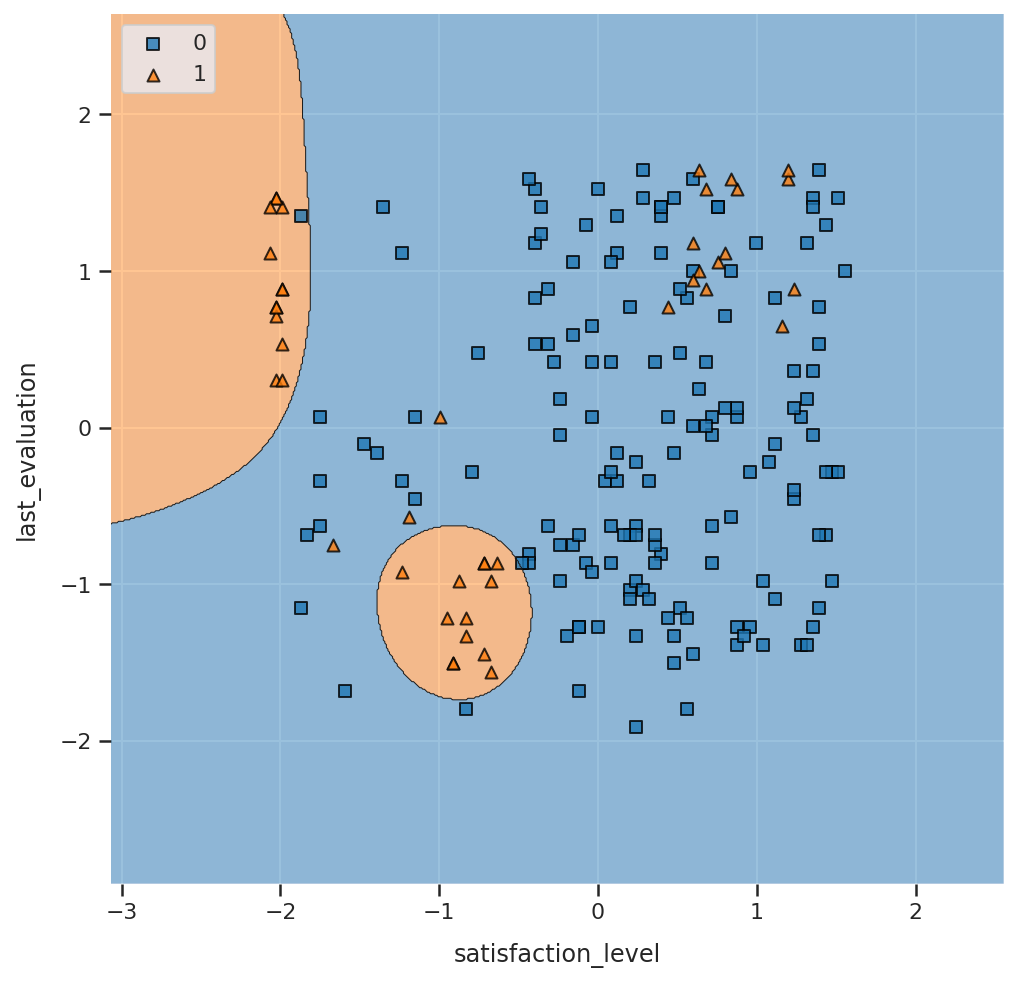

In [ ]:
svm = SVC(kernel='rbf',C=1,random_state=1)
svm.fit(X_test_std,y_test)
check_model_fit(svm, X_test_std, y_test)

Ex10
👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁

total accuracy = 89.1%


predictions     
                   0    1
actual 0        3210  206
       1         283  801


percent accuracy score per class:
left = 0 : 93.97%
left = 1 : 73.89%



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


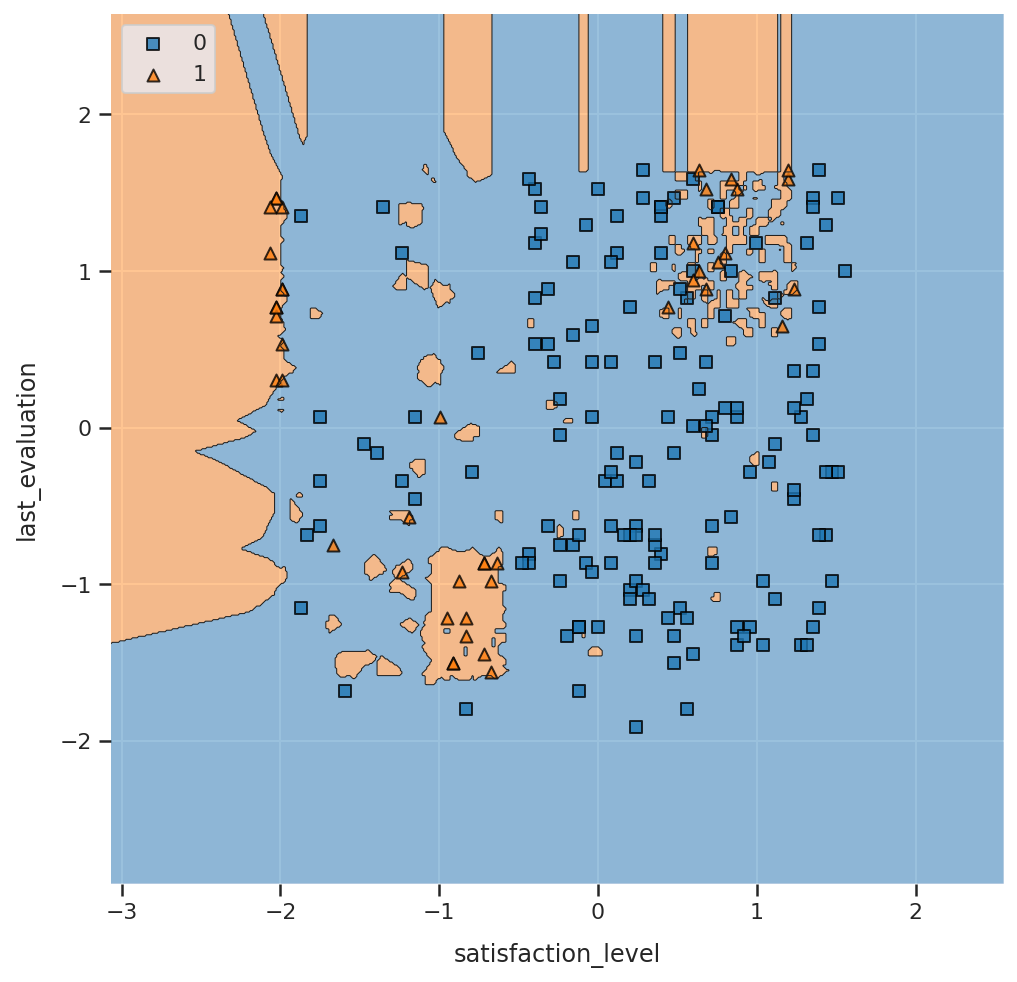

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)
check_model_fit(knn, X_test_std, y_test)


total accuracy = 90.8%


predictions     
                   0    1
actual 0        3280  136
       1         276  808


percent accuracy score per class:
left = 0 : 96.02%
left = 1 : 74.54%



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


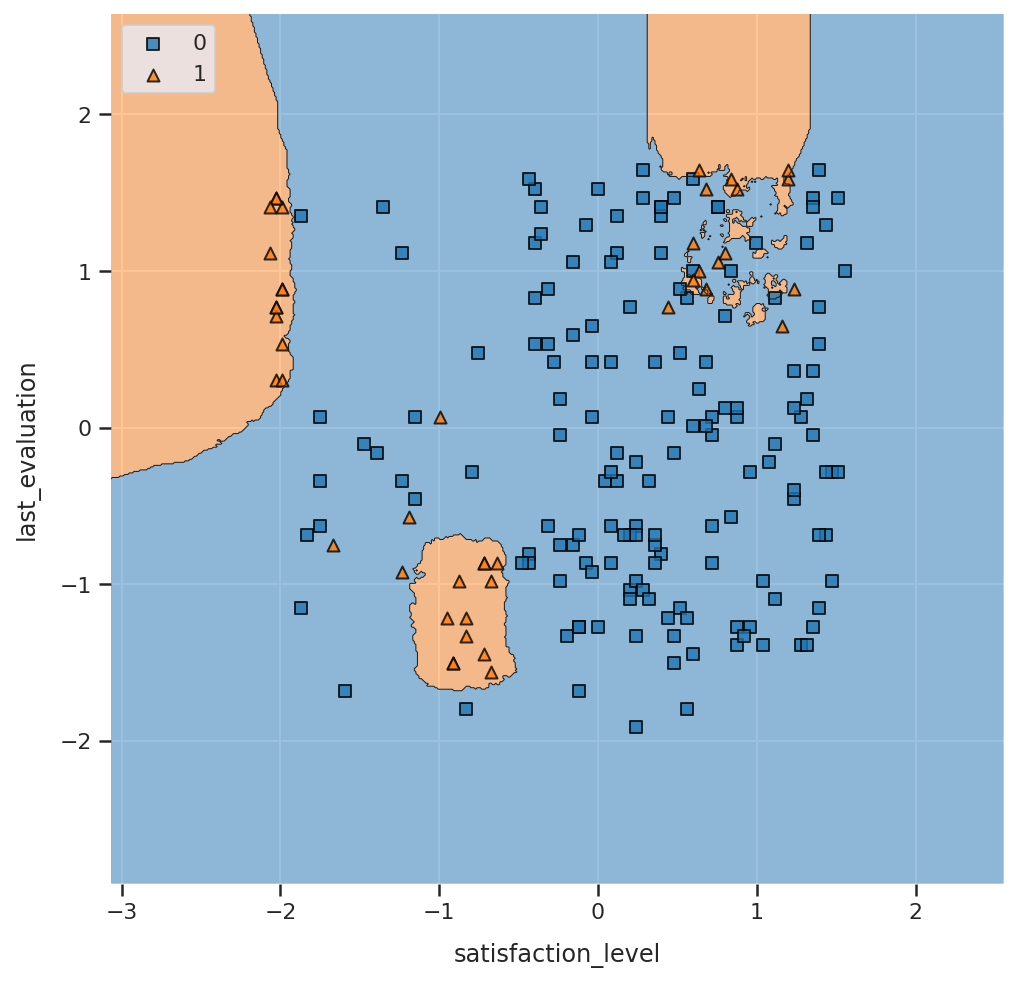

In [ ]:
knn= KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_std, y_train)
check_model_fit(knn,X_test_std, y_test)

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(path, names = headernames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

dataset.Class = dataset.Class.map({'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2})
X=dataset.iloc[:,:4].values
y=dataset.iloc[:,4].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3,
    random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
svm = SVC(kernel='rbf', C=1, random_state=1)
svm.fit(X_train_std,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
def check_model_fit_Iris(clf,x_test,y_test):
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred, normalize=True) * 100
    print('total accuracy = {:.1f}%'.format(acc))
    
    #confusion matrix
    cmat = confusion_matrix(y_test, y_pred)
    cols = pd.MultiIndex.from_tuples([('predictions', 0), ('predictions', 1), ('predictions', 2)])
    indx = pd.MultiIndex.from_tuples([('actual', 0), ('actual', 1), ('actual', 2)])
    display(pd.DataFrame(cmat, columns=cols, index=indx))
    print()
    
    #test-set accuracy
    print('percent accuracy score per class:')
    cmat = confusion_matrix(y_test, y_pred)
    scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    print('Iris-setosa : {:.2f}%'.format(scores[0]))
    print('Iris-versicolor : {:.2f}%'.format(scores[1]))
    print('Iris-virginica: {:.2f}%'.format(scores[2]))
    print()

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier

 knn = KNeighborsClassifier(n_neighbors=8)
 knn.fit(X_train_std,y_train)
 check_model_fit_Iris(knn, X_test_std,y_test)

total accuracy = 97.8%


predictions        
                   0   1   2
actual 0          14   0   0
       1           0  18   0
       2           0   1  12


percent accuracy score per class:
Iris-setosa : 100.00%
Iris-versicolor : 100.00%
Iris-virginica: 92.31%

